# Evoked Potentials

In [71]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.io as sc

#### Function for calculating the ensemble average (given the number of epochs)

In [24]:
def ensemble_average(signal_samples, num_epoch):
    signal_samples = np.array(signal_samples[0:num_epoch])
    return np.mean(signal_samples, axis=0)

#### Signal simulation

In [51]:
fs = 1000  # sampling frequency
t_start = -1
t_end = 1   
time = np.arange(t_start,t_end,1/fs)
A_max = 2
freq = 1
wave1 = A_max*np.sin(2*np.pi*freq*time)
wave2 = 2*A_max*np.sin(2*np.pi*freq*3*time)
signal = wave1+wave2

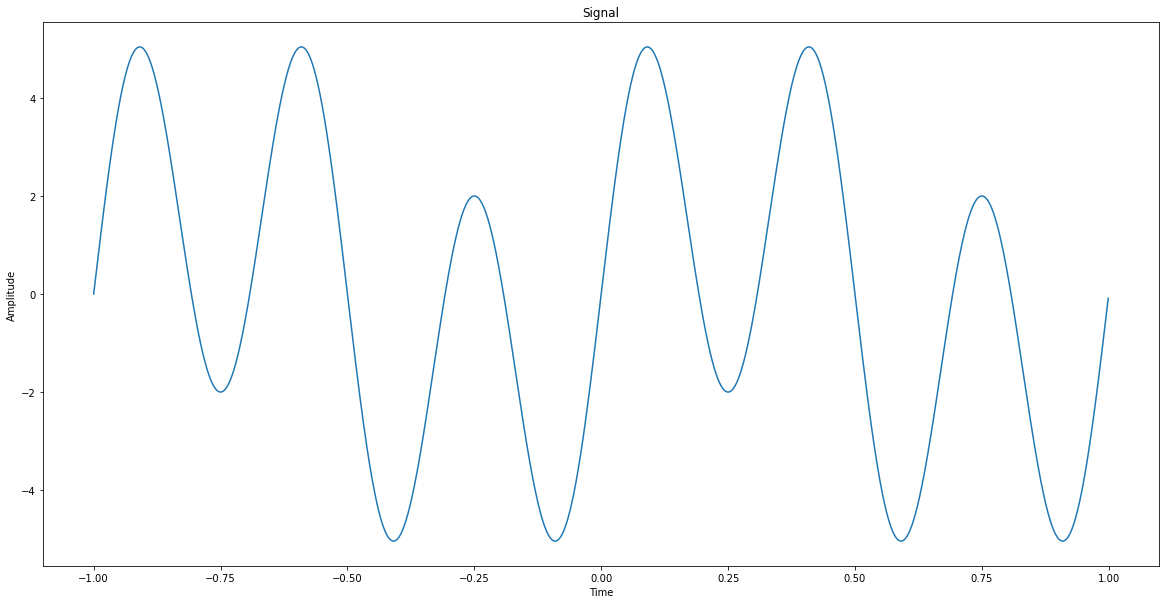

In [67]:
plt.figure(figsize= (20, 10))
plt.plot(time, signal)
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### White Noise

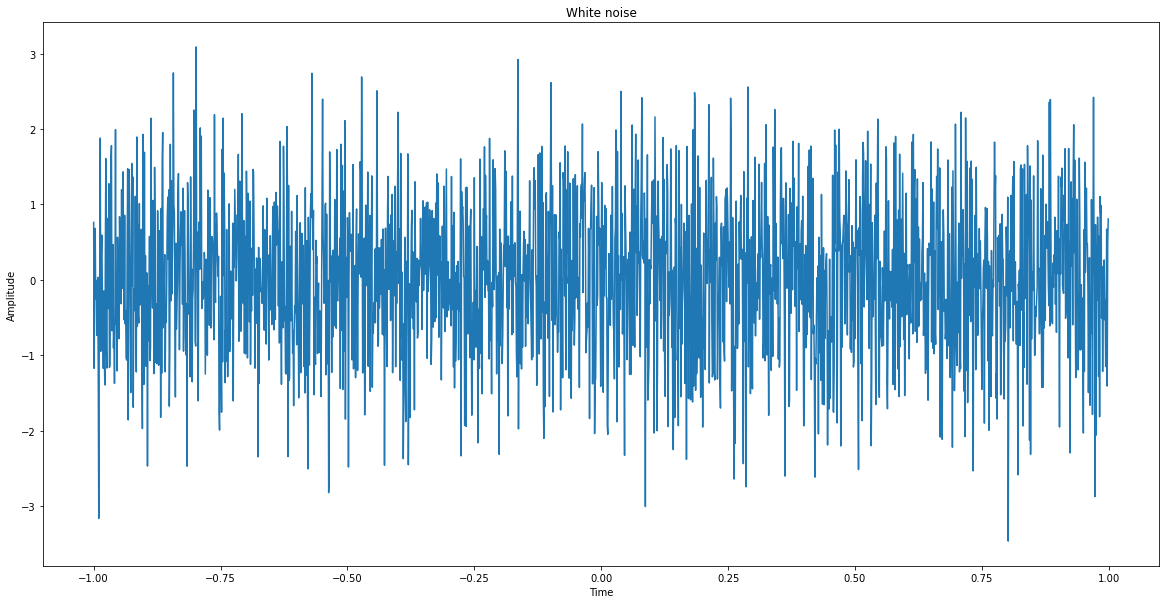

In [66]:
mean = 0
std = 1 
num_samples = len(time)
noise = np.random.normal(mean, std, size=num_samples)
plt.figure(figsize= (20, 10))
plt.plot(time, noise)
plt.title("White noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


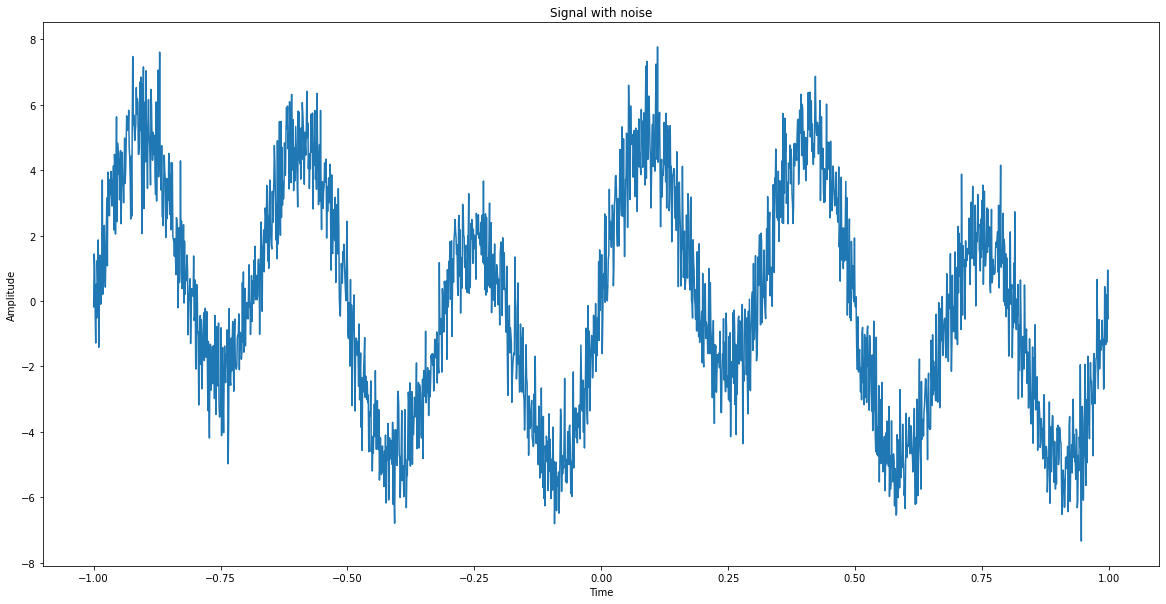

In [64]:
plt.figure(figsize= (20, 10))
plt.plot(time, signal+noise)
plt.title("Signal with noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### Generating signal with noise (random) for mutilple epochs

In [74]:
signal_samples = []
noise_samples = []
num_epoch = 300
for i in range(0,num_epoch):
    mean = 0
    std = 1 
    num_samples = len(time)
    noise = np.random.normal(mean, std, size=num_samples)
    noise_samples.append(noise)
    signal_samples.append(signal+noise)

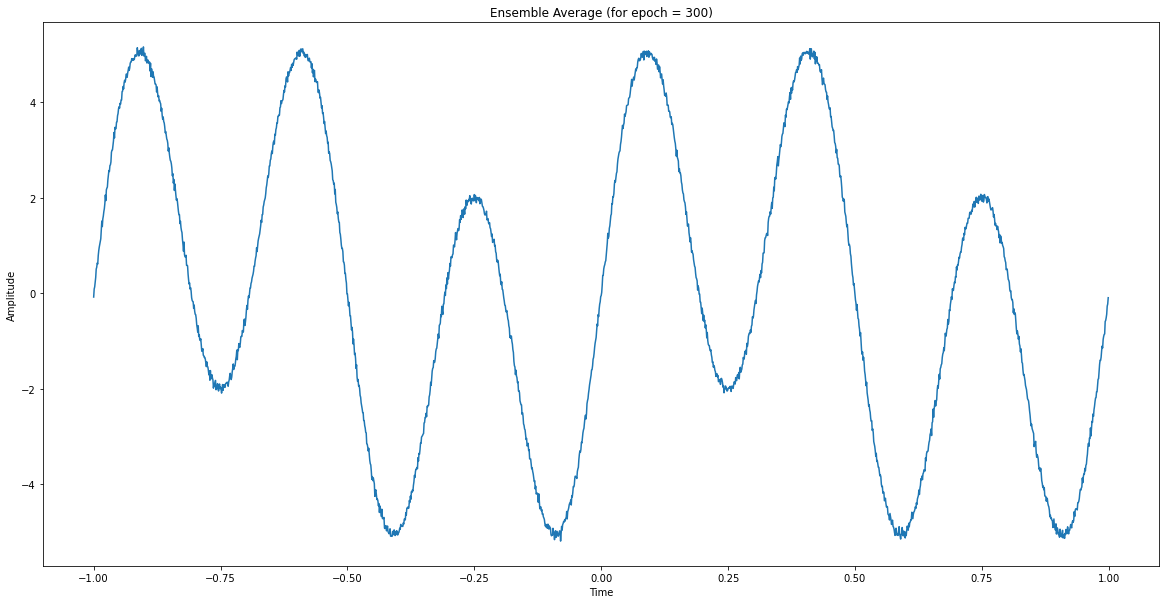

In [75]:
plt.figure(figsize= (20, 10))
plt.plot(time, ensemble_average(signal_samples, 300))
plt.title("Ensemble Average (for epoch = 300)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

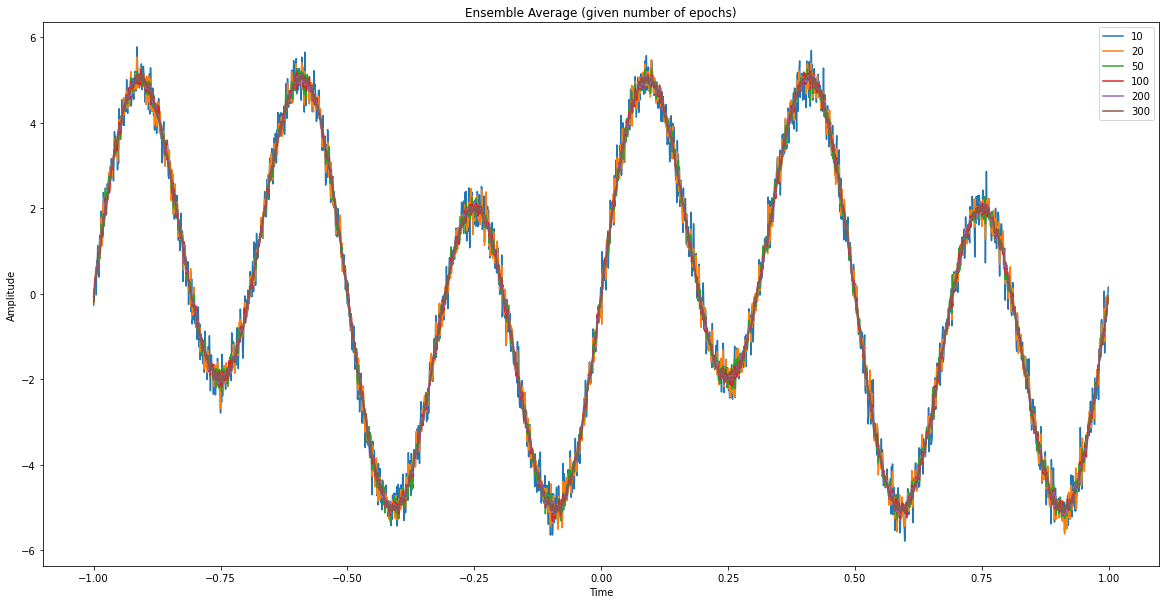

In [76]:
num_epoch = [10, 20, 50, 100, 200, 300]

plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    plt.plot(time, ensemble_average(signal_samples, num_epoch[i]), label=str(num_epoch[i]))
    plt.legend()
plt.title("Ensemble Average (given number of epochs)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### Signal with high amplitude noise (random) for mutiple epochs

In [77]:
signal_samples = []
noise_samples = []

num_epoch = 300

for i in range(0,num_epoch):
    mean = 0
    std = 1 
    num_samples = len(time)
    noise = 3*np.random.normal(mean, std, size=num_samples)
    noise_samples.append(noise)
    signal_samples.append(signal+noise)

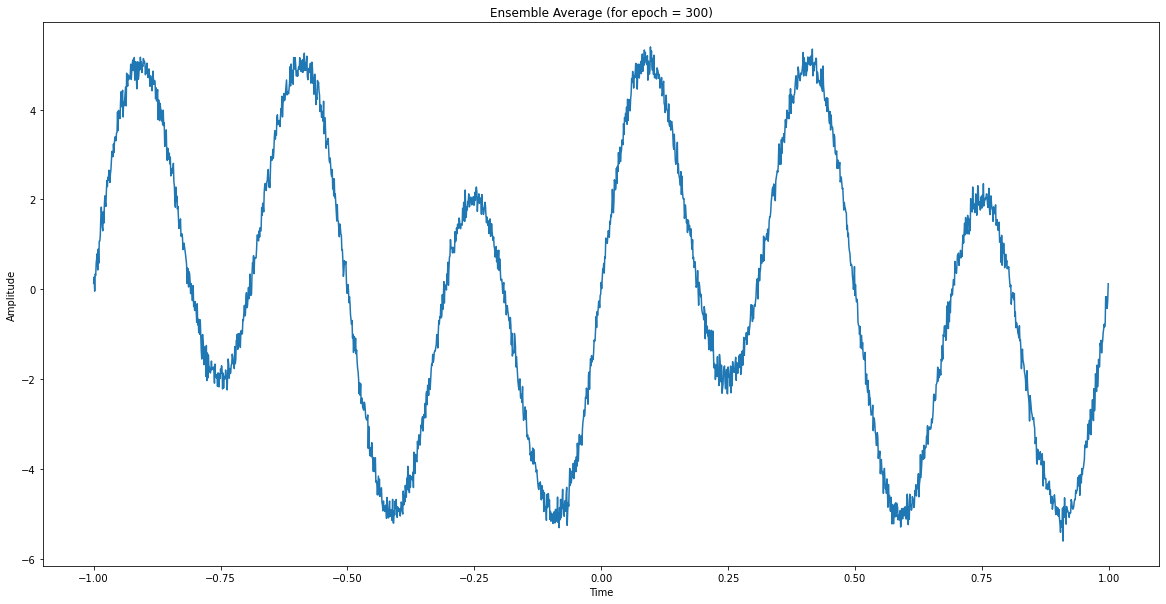

In [78]:
plt.figure(figsize= (20, 10))
plt.plot(time, ensemble_average(signal_samples, 300))
plt.title("Ensemble Average (for epoch = 300)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

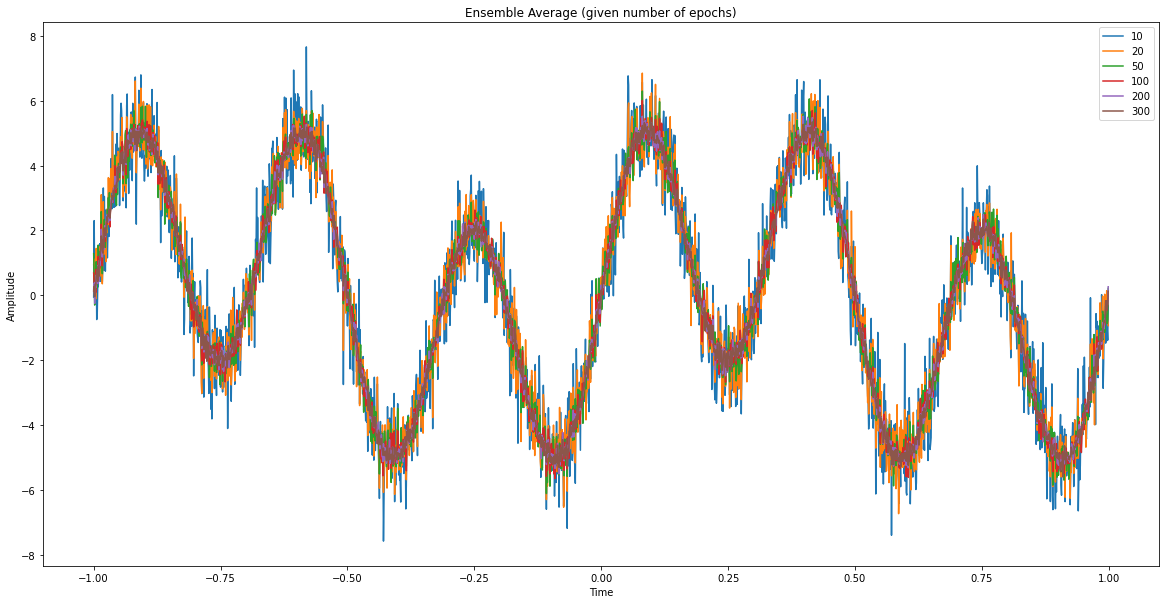

In [79]:
num_epoch = [10, 20, 50, 100, 200, 300]

plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    plt.plot(time, ensemble_average(signal_samples, num_epoch[i]), label=str(num_epoch[i]))
    plt.legend()
plt.title("Ensemble Average (given number of epochs)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
def jittered_sample(signal_samples, num_epoch):
    signal_samples = np.array(signal_samples[0:num_epoch])
    return np.mean(signal_samples, axis=0)

### Real EP Data

In [80]:
epData = pd.read_csv('epData.csv')
epData.describe()

,-1.2317
count,511999.000000
mean,0.259563
std,3.193595
min,-14.437000
25%,-1.886300
50%,0.225860
75%,2.364050
max,17.030000
